In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

# A little magic so we can see graphs
%matplotlib inline  

# overrides matplotlib
sns.set()

# import DataFrameSummary
from pandas_summary import DataFrameSummary

Importing diversion dataset

In [2]:
#import data
df = pd.read_csv('data_backup_4-2021/Diversion.csv')

Looking to see the columns, data types, and how many records/null's per column there are:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22508 entries, 0 to 22507
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CASE_ID                       22508 non-null  int64 
 1   CASE_PARTICIPANT_ID           22508 non-null  int64 
 2   RECEIVED_DATE                 22508 non-null  object
 3   OFFENSE_CATEGORY              22508 non-null  object
 4   DIVERSION_PROGRAM             22508 non-null  object
 5   REFERRAL_DATE                 22508 non-null  object
 6   DIVERSION_COUNT               22508 non-null  int64 
 7   PRIMARY_CHARGE_OFFENSE_TITLE  22508 non-null  object
 8   STATUTE                       22508 non-null  object
 9   RACE                          22508 non-null  object
 10  GENDER                        22508 non-null  object
 11  DIVERSION_RESULT              17393 non-null  object
 12  DIVERSION_CLOSED_DATE         17393 non-null  object
dtypes: int64(3), obj

In [4]:
df.head(20)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,382673022762,710725949269,01/01/2011 12:00:00 AM,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM
1,382673022762,710725949269,01/01/2011 12:00:00 AM,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN
2,382676253565,710735386491,01/02/2011 12:00:00 AM,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM
3,382680365495,710746899902,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,NaN,NaN
4,382680365495,710746994274,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,NaN,NaN
5,382688736212,710769171745,01/03/2011 12:00:00 AM,Narcotics,DS,01/19/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,Graduated,05/13/2011 12:00:00 AM
6,382696666364,710792198566,01/03/2011 12:00:00 AM,Narcotics,DS,01/18/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,Graduated,05/13/2011 12:00:00 AM
7,382696813219,710792670427,01/03/2011 12:00:00 AM,Narcotics,DS,01/20/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,Graduated,05/13/2011 12:00:00 AM
8,382696960073,710792764800,01/01/2011 12:00:00 AM,Narcotics,DS,03/03/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,Graduated,03/03/2011 12:00:00 AM
9,382697400637,710793802894,01/02/2011 12:00:00 AM,Narcotics,DS,07/26/2011 12:00:00 AM,1,[POSSESSION OF CANNABIS WITH INTENT TO DELIVER...,720 ILCS 550/5(c),Black,Male,NaN,NaN


In [5]:
summary = DataFrameSummary(df)

As seen below, not many nulls as a % of all records for each column:

In [6]:
summary.columns_stats.transpose()

,counts,uniques,missing,missing_perc,types
CASE_ID,22508,20548,0,0%,numeric
CASE_PARTICIPANT_ID,22508,21355,0,0%,numeric
RECEIVED_DATE,22508,3233,0,0%,categorical
OFFENSE_CATEGORY,22508,56,0,0%,categorical
DIVERSION_PROGRAM,22508,9,0,0%,categorical
REFERRAL_DATE,22508,2631,0,0%,categorical
DIVERSION_COUNT,22508,4,0,0%,numeric
PRIMARY_CHARGE_OFFENSE_TITLE,22508,230,0,0%,categorical
STATUTE,22508,303,0,0%,categorical
RACE,22508,7,0,0%,categorical


Converting all data columns to datatime data types:

In [7]:
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'], errors='coerce')

In [8]:
df['REFERRAL_DATE'] = pd.to_datetime(df['REFERRAL_DATE'], errors='coerce')

In [9]:
df['DIVERSION_CLOSED_DATE'] = pd.to_datetime(df['DIVERSION_CLOSED_DATE'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22508 entries, 0 to 22507
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CASE_ID                       22508 non-null  int64         
 1   CASE_PARTICIPANT_ID           22508 non-null  int64         
 2   RECEIVED_DATE                 22508 non-null  datetime64[ns]
 3   OFFENSE_CATEGORY              22508 non-null  object        
 4   DIVERSION_PROGRAM             22508 non-null  object        
 5   REFERRAL_DATE                 22508 non-null  datetime64[ns]
 6   DIVERSION_COUNT               22508 non-null  int64         
 7   PRIMARY_CHARGE_OFFENSE_TITLE  22508 non-null  object        
 8   STATUTE                       22508 non-null  object        
 9   RACE                          22508 non-null  object        
 10  GENDER                        22508 non-null  object        
 11  DIVERSION_RESULT            

In [11]:
df.shape

(22508, 13)

Dropping rows with missing values which, as seen in previous outputs, aren't many:

In [12]:
df.dropna(inplace=True)
df.shape

(17393, 13)

Looking at case counts by race:

In [13]:
df.groupby('RACE')['CASE_ID'].count()

RACE
Asian        244
Biracial      63
Black       8803
Latinx      2891
Other          6
Unknown      396
White       4990
Name: CASE_ID, dtype: int64

Visualizing case counts by race:

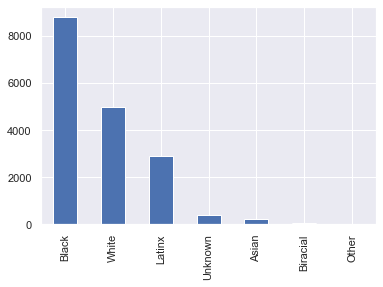

In [14]:
ax = df['RACE'].value_counts().plot.bar()

Visualizing case counts by gender:

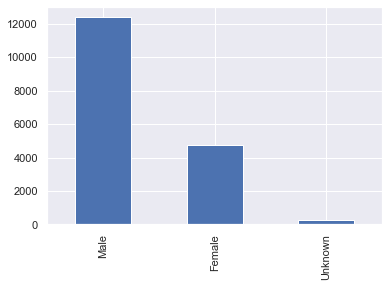

In [15]:
ax = df['GENDER'].value_counts().plot.bar()

Looking at diversion results by race:

In [16]:
divresult_race = df.groupby(['RACE','DIVERSION_RESULT'])['CASE_ID'].count().unstack().fillna(0)
divresult_race

DIVERSION_RESULT,Failed,Graduated
RACE,,
Asian,33,211
Biracial,23,40
Black,2578,6225
Latinx,527,2364
Other,1,5
Unknown,29,367
White,936,4054


Stacked bar chart of diversion results by race

<AxesSubplot:xlabel='RACE'>

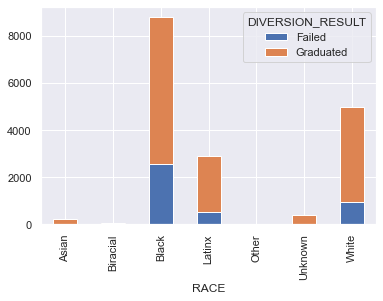

In [17]:
divresult_race.plot(kind='bar', stacked=True)


Looking at diversion results by gender:

In [18]:
divresult_gender = df.groupby(['GENDER','DIVERSION_RESULT'])['CASE_ID'].count().unstack().fillna(0)
divresult_gender

DIVERSION_RESULT,Failed,Graduated
GENDER,,
Female,1158,3607
Male,2953,9430
Unknown,16,229


Stacked bar chart of diversion results by race

<AxesSubplot:xlabel='GENDER'>

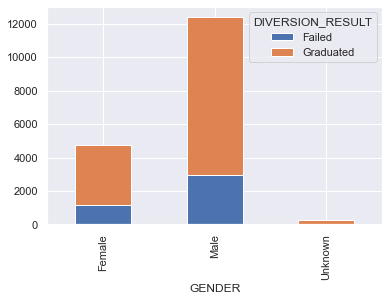

In [19]:
divresult_gender.plot(kind='bar', stacked=True)


Case counts by categories:

In [20]:
df.groupby('OFFENSE_CATEGORY')['CASE_ID'].count().sort_values(ascending=False)

OFFENSE_CATEGORY
Narcotics                                        12081
Retail Theft                                      2200
Theft                                              803
Burglary                                           518
Forgery                                            405
Other Offense                                      212
Identity Theft                                     173
Criminal Damage to Property                        168
Possession of Stolen Motor Vehicle                 158
Credit Card Cases                                  145
Escape - Failure to Return                          89
Fraudulent ID                                       88
Driving With Suspended Or Revoked License           42
Aggravated Battery Police Officer                   40
Residential Burglary                                37
Aggravated Fleeing and Eluding                      33
UUW - Unlawful Use of Weapon                        29
Deceptive Practice                              

Top 5 categories by gender by case count:

In [21]:
topfive_cat_gender = df.groupby(['OFFENSE_CATEGORY','GENDER'])['CASE_ID'].count().sort_values(ascending=False).head(9).unstack().fillna(0)
topfive_cat_gender

GENDER,Male,Female
OFFENSE_CATEGORY,,
Narcotics,9406.0,2614.0
Retail Theft,1010.0,1121.0
Burglary,448.0,0.0
Theft,445.0,320.0
Forgery,151.0,237.0


Visualizing top 5 categories by gender by case count via stacked bar chart:

<AxesSubplot:xlabel='OFFENSE_CATEGORY'>

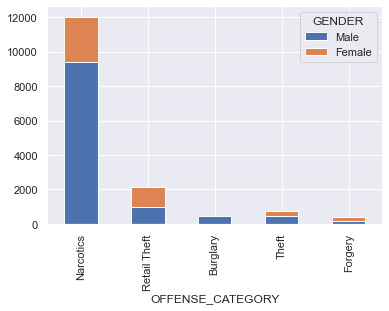

In [22]:
topfive_cat_gender.plot(kind='bar', stacked=True)

In [3]:
topfive_cat_race = df.groupby(['OFFENSE_CATEGORY','RACE'])['CASE_ID'].count().sort_values(ascending=False).head(9).unstack().fillna(0)
topfive_cat_race

RACE,Black,White,Latinx
OFFENSE_CATEGORY,,,
Narcotics,7808.0,4406.0,2462.0
Retail Theft,1605.0,874.0,371.0
Theft,523.0,0.0,0.0
Forgery,341.0,0.0,0.0
Burglary,318.0,0.0,0.0


Visualizing top 5 categories by gender by case count via stacked bar chart:

<AxesSubplot:xlabel='OFFENSE_CATEGORY'>

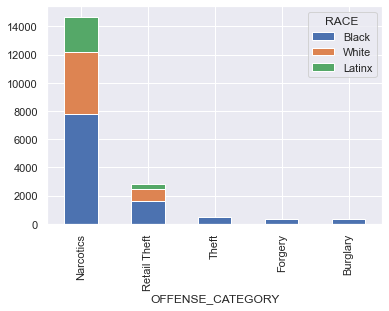

In [4]:
topfive_cat_race.plot(kind='bar', stacked=True)

A look at diversion result based on diversion program:

In [23]:
divprogram_result = df.groupby(['DIVERSION_PROGRAM','DIVERSION_RESULT'])['CASE_ID'].count().unstack().fillna(0)
divprogram_result

DIVERSION_RESULT,Failed,Graduated
DIVERSION_PROGRAM,,
ACT,160,122
ARI,242,320
BR9,889,3551
DC,674,560
DDPP,818,3773
DS,681,4164
MHC,517,476
RJCC,32,78
VC,114,222


Visualization of diversion result by diversion program:

<AxesSubplot:xlabel='DIVERSION_PROGRAM'>

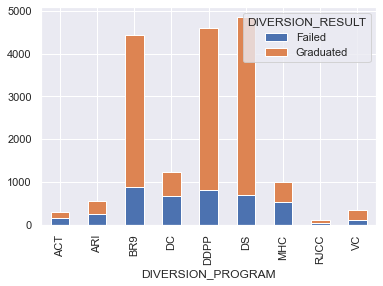

In [24]:
divprogram_result.plot(kind='bar', stacked=True)

Diversion result by diversion referrals:

In [25]:
divresult_count = df.groupby(['DIVERSION_COUNT','DIVERSION_RESULT'])['CASE_ID'].count().unstack().fillna(0)
divresult_count

DIVERSION_RESULT,Failed,Graduated
DIVERSION_COUNT,,
1,3913.0,12946.0
2,194.0,319.0
3,17.0,1.0
4,3.0,0.0


Creating a new column in the dataset showing the days between referral & diversion closure:

In [31]:
from datetime import datetime

DAYS_BETWEEN_REFERRAL_AND_CLOSURE = (df['DIVERSION_CLOSED_DATE']-df['REFERRAL_DATE']).dt.days
df['DAYS_BETWEEN_REFERRAL_AND_CLOSURE'] = DAYS_BETWEEN_REFERRAL_AND_CLOSURE

df.head(10)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE,DAYS_BETWEEN_REFERRAL_AND_CLOSURE
0,382673022762,710725949269,2011-01-01,Retail Theft,DS,2013-06-17,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,2013-06-17,0
2,382676253565,710735386491,2011-01-02,Retail Theft,MHC,2012-09-14,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,2012-09-14,0
5,382688736212,710769171745,2011-01-03,Narcotics,DS,2011-01-19,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,Graduated,2011-05-13,114
6,382696666364,710792198566,2011-01-03,Narcotics,DS,2011-01-18,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,Graduated,2011-05-13,115
7,382696813219,710792670427,2011-01-03,Narcotics,DS,2011-01-20,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,Graduated,2011-05-13,113
8,382696960073,710792764800,2011-01-01,Narcotics,DS,2011-03-03,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,Graduated,2011-03-03,0
10,382699750312,710800597694,2011-01-03,Narcotics,DS,2012-11-26,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Female,Graduated,2013-02-13,79
11,382705918208,710823341398,2011-01-04,Narcotics,DS,2011-01-19,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Female,Graduated,2011-05-13,114
12,382706946191,710826266937,2011-01-04,Narcotics,DS,2011-01-19,1,POSSESSION OF CANNABIS,720 ILCS 550/4(d),Black,Male,Failed,2011-05-13,114
13,382709736430,710835515414,2011-01-04,Narcotics,DS,2011-01-20,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,Graduated,2011-05-13,113


Histogram showing the amt of days between referral & diversion closure dates

C:\Users\jvill\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

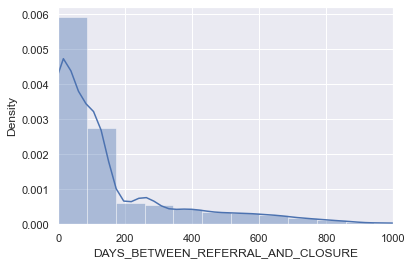

In [33]:
sns.distplot(df['DAYS_BETWEEN_REFERRAL_AND_CLOSURE'])
plt.xlim(0, 1000)

Boxplot showing the days between referral & diversion closure dates in relation to diversion results:

(0.0, 1000.0)

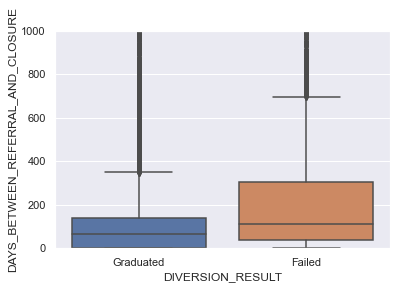

In [35]:
sns.boxplot(x='DIVERSION_RESULT', y='DAYS_BETWEEN_REFERRAL_AND_CLOSURE',data=df)
plt.ylim(0, 1000)

Boxplot showing the days between referral & diversion closure dates in relation to race:

(0.0, 500.0)

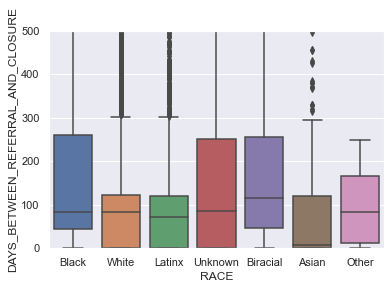

In [39]:
sns.boxplot(x='RACE', y='DAYS_BETWEEN_REFERRAL_AND_CLOSURE',data=df)
plt.ylim(0, 500)

Boxplot showing the days between referral & diversion closure dates in relation to gender:

(0.0, 1000.0)

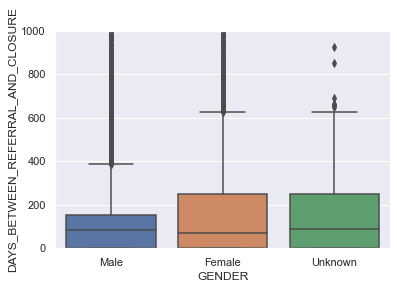

In [41]:
sns.boxplot(x='GENDER', y='DAYS_BETWEEN_REFERRAL_AND_CLOSURE',data=df)
plt.ylim(0, 1000)

In [42]:
# save the auto-EDA report as diversion_eda.html
report = ProfileReport(df)
report.to_file('JVillafañe_DiversionEDA.html')